Your objective is to build a Bubble Plot that showcases the relationship between four key variables:

-Average Fare ($) Per City
-Total Number of Rides Per City
-Total Number of Drivers Per City
-City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

-% of Total Fares by City Type
-% of Total Rides by City Type
-% of Total Drivers by City Type
As final considerations:
-You must use the Pandas Library and the Jupyter Notebook.
-You must use the Matplotlib libraries.
-You must include a written description of three observable trends based on the data.

You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
Remember when making your plots to consider aesthetics!
You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.
You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.
See Example Solution for a reference on expected format.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn 

#files to load 
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

In [2]:
colors = ('darkcyan', 'darkolivegreen', 'saddlebrown')

In [3]:
#pull into pandas
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

#merge data files 
complete_data = pd.merge(city_data, ride_data, how="left", on=["city", "city"])

In [4]:
complete_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [22]:
#calculate average fare($) by rider, total number rides per city, total # drivers per city, city type

average_fare = complete_data.fare.mean()
total_rides = complete_data.groupby(["city"]).count()
total_drivers = complete_data.groupby(["type", "city"]).driver_count.count()


In [23]:
urban_city_type = complete_data[complete_data.type == "Urban"]
rural_city_type = complete_data[complete_data.type == "Rural"]
suburban_city_type = complete_data[complete_data.type == "Suburban"]

urban_ride_count = urban_city_type.groupby(["city"])["ride_id"].count()
rural_ride_count = rural_city_type.groupby(["city"])["ride_id"].count()
suburban_ride_count = suburban_city_type.groupby(["city"])["ride_id"].count()

urban_fare_count = urban_city_type.groupby(["city"])["fare"].mean()
rural_fare_count = rural_city_type.groupby(["city"])["fare"].mean()
suburban_fare_count = suburban_city_type.groupby(["city"])["fare"].mean()

urban_driver_count = urban_city_type.groupby(["city"]).driver_count.mean()
rural_driver_count = rural_city_type.groupby(["city"]).driver_count.mean()
suburban_driver_count = suburban_city_type.groupby(["city"]).driver_count.mean()

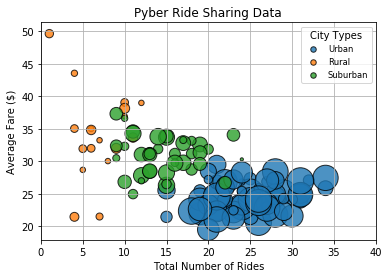

In [25]:
#create a scatter/bubble chart showcasing the relationship
plt.scatter(urban_ride_count, 
            urban_fare_count, 
            s=10*urban_driver_count,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.scatter(rural_ride_count, 
            rural_fare_count, 
            s=10*rural_driver_count,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Rural")

plt.scatter(suburban_ride_count, 
            suburban_fare_count, 
            s=10*suburban_driver_count,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Suburban")

plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides")
plt.xlim((0,40))
plt.grid(True)


lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()


In [27]:
# pie chart % of Total Fares by City Type  

#Group city table by type
city_group_type = complete_data.groupby(["type"], as_index='False')

#Sum driver count, fare and ride count in city table grouped by type
city_group_type_summary = city_group_type["driver_count", "fare", "Ride_Count"].sum().reset_index('type')

#Create color
colors = ["lemonchiffon", "lightblue", "coral"]
explode = [0, 0, 0.1]

#Plot pie chart for  the city table grouped by type for fare
plt.pie(city_group_type_summary["fare"], labels=city_group_type_summary["type"], colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type")
plt.show()


KeyError: "Columns not found: 'Ride_Count'"

In [ ]:
# pie chart % of Total Rides by City Type 

In [ ]:
#pie chart % of Total Drivers by City Type